In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
train_path = "dataset/MNIST(Ass2&3)/mnist_train.csv"
test_path = "dataset/MNIST(Ass2&3)/mnist_test.csv"

# Read CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Split into features (X) and labels (y)
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [12]:
# c. Define the Feedforward Neural Network architecture

model = models.Sequential([
    tf.keras.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model using SGD optimizer
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# d. Train the model for 11 epochs

history = model.fit(
    x_train, y_train,
    epochs=11,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8384 - loss: 0.6223 - val_accuracy: 0.9245 - val_loss: 0.2691
Epoch 2/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9163 - loss: 0.2943 - val_accuracy: 0.9403 - val_loss: 0.2156
Epoch 3/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9309 - loss: 0.2403 - val_accuracy: 0.9510 - val_loss: 0.1801
Epoch 4/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9414 - loss: 0.2056 - val_accuracy: 0.9567 - val_loss: 0.1611
Epoch 5/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9481 - loss: 0.1798 - val_accuracy: 0.9628 - val_loss: 0.1385
Epoch 6/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9546 - loss: 0.1590 - val_accuracy: 0.9632 - val_loss: 0.1330
Epoch 7/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9586 - loss: 0.1427 - val_accuracy: 0.9655 - val_loss: 0.1199
Epoch 8/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9631 - loss: 0.12

In [14]:
# e. Evaluate the network on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9696 - loss: 0.1064

Test Accuracy: 0.9696
Test Loss: 0.1064


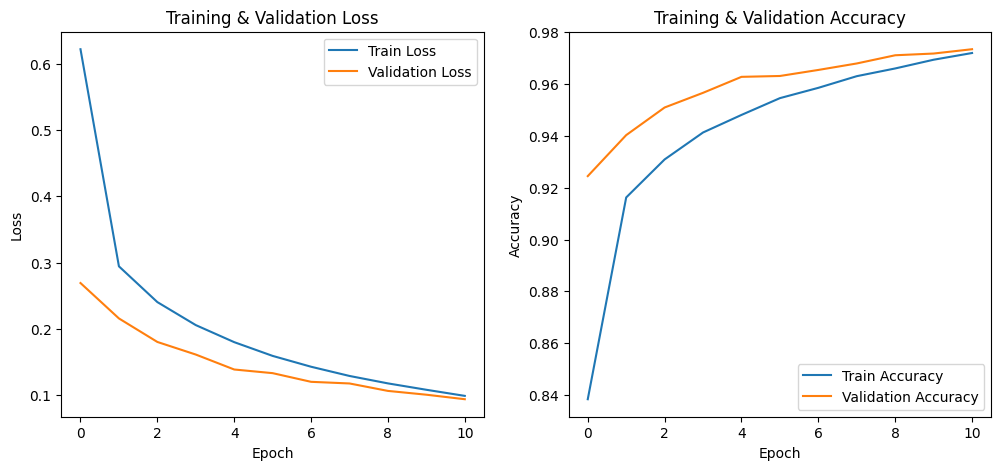

In [15]:
# f. Plot Training & Validation Loss and Accuracy

plt.figure(figsize=(12,5))

# ---- Loss Plot ----
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# ---- Accuracy Plot ----
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

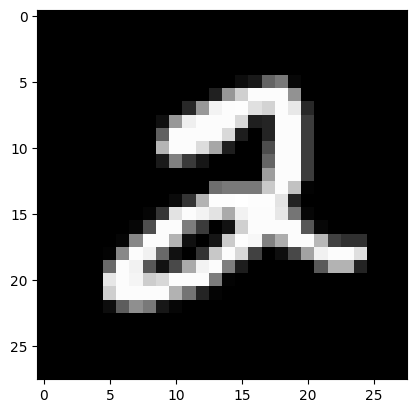

In [16]:
img = x_train[5].reshape(28, 28)
plt.imshow(img, cmap="gray")
plt.show()